<a href="https://colab.research.google.com/github/chhendley/chhendley_python_projects/blob/main/medical_abstract_classifier_project_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install keras-tuner -q
#installing the required libraries
import keras_tuner
from tensorflow import keras
from keras_tuner import RandomSearch, GridSearch

In [23]:
!pip install spacy
!pip install scispacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scispacy-0.5.2-py3-none-any.whl (45 kB)
  Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached conllu-4.5.2-py2.py3-none-any.whl (16 kB)
  Using cached nmslib-2.1.1.tar.gz (188 kB)
  Preparing metadata (setup.py) ... done
  Using cached pysbd-0.3.4-py3-none-any.whl (71 kB)
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, op

In [24]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.5.1-py3-none-any.whl size=120253146 sha256=b8b0e9636aeacfb3155a07bbfa0bb1aab330f6cff166fd15d2806889e82d8499
  Stored in directory: /root/.cache/pip/wheels/a0/08/9d/5a05b2b428c07c244a314064fc57a966bcc871b4164590df4d
Successfully built en-core-sci-md
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
ERROR: pip's depend

In [27]:
import pandas as pd
import io
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.layers import BatchNormalization, LayerNormalization
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import keras
from keras.layers.core.dense import utils
from keras.utils import pad_sequences
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import spacy
import scispacy
from sklearn.model_selection import train_test_split
from keras.saving.legacy.saving_utils import model_call_inputs
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = stopwords.words('english')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: ignored

In [28]:
#nlp = spacy.load("en_core_web_sm")
nlp = spacy.load('en_core_sci_md')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_sci_md' (0.5.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


In [29]:
from google.colab import drive
drive.mount('/content/drive')
copied_path = ('drive/MyDrive/Colab Notebooks/processing_train.csv')
raw_df = pd.read_csv('https://github.com/sebischair/Medical-Abstracts-TC-Corpus/raw/main/medical_tc_train.csv')
df2 = pd.read_csv(copied_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#types of classes: 2)digestive system diseases, 4)cardiovascular diseases, 1)neoplasms, 3)nervous system diseases, and 5)general pathological conditions.

In [31]:
#raw_df = df.drop(df.columns[[0, 1]],axis = 1)

In [32]:
raw_df.rename(columns={"condition_label": "Labels"}, inplace=True)
display(raw_df)

,Labels,medical_abstract
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...
...,...,...
11545,1,Epirubicin at two dose levels with prednisolon...
11546,1,Four and a half year follow up of women with d...
11547,5,Safety of the transbronchial biopsy in outpati...
11548,3,Interictal spikes and hippocampal somatostatin...


In [33]:
def train_df(df_a, x):
  df_b = df_a.copy()
  df = df_b[df_b['Labels']==x]
  df.reset_index(inplace=True)
  df.drop(df.index[1494:], inplace=True)
  return df


In [34]:
#run train_df on all 5 categories and concat into single df for training

#1494 max length of dfs
raw_df_1 = train_df(raw_df, 1)
raw_df_2 = train_df(raw_df, 2)
raw_df_3 = train_df(raw_df, 3)
raw_df_4 = train_df(raw_df, 4)
raw_df_5 = train_df(raw_df, 5)
original_df = pd.concat([raw_df_1, raw_df_2, raw_df_3, raw_df_4, raw_df_5])
display(original_df)

<ipython-input-33-1eaa7fe973d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[1494:], inplace=True)
<ipython-input-33-1eaa7fe973d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[1494:], inplace=True)
<ipython-input-33-1eaa7fe973d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[1494:], inplace=True)
<ipython-input-33-1eaa7fe973d6>:5: SettingWithCopyWarning: 
A value is trying t

,index,Labels,medical_abstract
0,1,1,Neuropeptide Y and neuron-specific enolase lev...
1,3,1,Lipolytic factors associated with murine and h...
2,11,1,Imaging bone tumors in the 1990s. Progress in ...
3,13,1,Utility of frozen-section evaluation of lymph ...
4,16,1,Left ventricular fibroma: echocardiographic di...
...,...,...,...
1489,4494,5,Hematoma of the optic nerve sheath after penet...
1490,4496,5,Intraoperative assessment of cerebral ischemia...
1491,4498,5,Glucagonoma syndrome is an underdiagnosed clin...
1492,4501,5,Acute pelvic inflammatory disease after surgic...


In [35]:
original_df['text_spacy']= original_df['medical_abstract'].apply(nlp)
#original_df['text_token'] = original_df['text_token'].apply(lambda x: [item for item in x if item not in stpwrd])

In [36]:
display(original_df['medical_abstract'])

0       Neuropeptide Y and neuron-specific enolase lev...
1       Lipolytic factors associated with murine and h...
2       Imaging bone tumors in the 1990s. Progress in ...
3       Utility of frozen-section evaluation of lymph ...
4       Left ventricular fibroma: echocardiographic di...
                              ...                        
1489    Hematoma of the optic nerve sheath after penet...
1490    Intraoperative assessment of cerebral ischemia...
1491    Glucagonoma syndrome is an underdiagnosed clin...
1492    Acute pelvic inflammatory disease after surgic...
1493    Effects of nimodipine on cerebral blood flow a...
Name: medical_abstract, Length: 7171, dtype: object

In [37]:
import re
def remove_non_numberics(s):
    return re.sub('[^a-zA-Z\s]', '', s)

original_df['Text'] = original_df['medical_abstract'].apply(remove_non_numberics)

In [38]:
#use Keras tokenizer to tokenize dataset
data = original_df['Text'].map(text_to_word_sequence).values
total_vocabulary = set(word.lower() for tweet in data for word in tweet)  # set created from nested comprehension
print('There are {} unique words in the dataset.'.format(len(total_vocabulary)))
print('There are {} unique abstracts in the dataset.'.format(len(data)))

There are 33165 unique words in the dataset.
There are 7171 unique abstracts in the dataset.


In [39]:
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects from collections
from nltk import Counter

In [40]:
data = []
for i in range(len(original_df.index)):
  g = len(original_df.loc[i, 'text_spacy'])
  data.append(g)

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

KeyError: ignored

In [41]:
import keras
from keras.layers.core.dense import utils
from keras.utils import pad_sequences
#set the emotion/sentiment as our target
target = original_df['Labels']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

# use keras to create a Tokenizer object
tokenizer = text.Tokenizer(num_words=38625)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(original_df['Text']))
tokenized_texts = tokenizer.texts_to_sequences(original_df['Text'])
X = keras.utils.pad_sequences(tokenized_texts, maxlen=2500)

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = stopwords.words('english')
nltk.download('wordnet')

stop_list = ['subject', 'feature', 'child','patient', 'patients', 'case', 'cases','group', 'disease', 'cell', 'study','studies', 'p', 'le', 'case', 'treatment', 'treated', 'year','years',  'two', 'may', 'result','results', 'one',
       'rate', 'effect','effects','clinical', 'control', 'mean', 'therapy', 'level', 'levels',
       'normal', 'month','months', 'associated', 'pressure','also', 'analysis'
       'significantly', 'three', 'risk', 'significant',
       'factor', 'increased', 'age', 'compared', 'time', 'lesion','left', 'total', 'analysis'
       'also', 'diagnosis', 'found', 'change', 'syndrome','pain', 'symptoms',
       'surgery', 'less', 'greater', 'without', 'used', 'using', 'showed', 'lesions', 'groups', 'performed', 'children', 'four', 'use', 'high', 'human', 'however', 'followup', 'per']
stpwrd = nltk.corpus.stopwords.words('english')
# entend()function is used to add custom stopwords
for i in stop_list:
  stpwrd.append(i)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
df_1 = original_df[original_df['Labels']=='1']
df_2 = original_df[original_df['Labels']=='2']
df_3 = original_df[original_df['Labels']=='3']
df_4 = original_df[original_df['Labels']=='4']
df_5 = original_df[original_df['Labels']=='5']


In [45]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

# set the emotion/sentiment as our target
target = original_df['Labels']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

original_df['text'] = original_df['Text'].astype(str).str.lower()
regexp = RegexpTokenizer('\w+')
original_df['text_token']= original_df['text'].apply(regexp.tokenize)
original_df['text_token'] = original_df['text_token'].apply(lambda x: [item for item in x if item not in stpwrd])
original_df['text_string'] = original_df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in original_df['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)
fdist = FreqDist(tokenized_words)
wordnet_lem = WordNetLemmatizer()
original_df['text_string_lem'] = original_df['text_string'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in original_df['text_string_lem']])
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
pandas_list = original_df['text_string_lem'].values.tolist()
tokenized_texts = tokenizer.texts_to_sequences(pandas_list)
#X_pandas = tf.keras.utils.pad_sequences(tokenized_texts, maxlen=2000) original
X_pandas = tf.keras.utils.pad_sequences(tokenized_texts, maxlen=200) #shortened text space

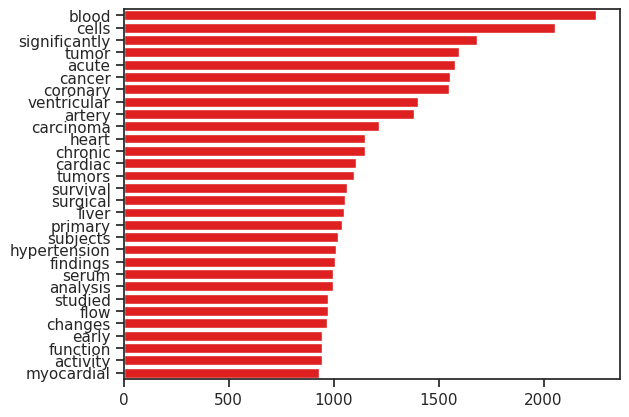

In [47]:
# Obtain top 10 words
top_10 = fd.most_common(30)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='red');

In [48]:
# set the emotion/sentiment as our target
df = df_1.copy()

target = df['Labels']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

df['text'] = df['Text'].astype(str).str.lower()
regexp = RegexpTokenizer('\w+')
df['text_token']= df['text'].apply(regexp.tokenize)
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in df['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)
fdist = FreqDist(tokenized_words)
wordnet_lem = WordNetLemmatizer()
df['text_string_lem'] = df['text_string'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in original_df['text_string_lem']])
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

print("number of samples in category", len(df.index))

# Obtain top 10 words
top_words = fd #.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_words))

display(fdist)
import seaborn as sns

number of samples in category 0


neuropeptide       17
neuronspecific      9
enolase            10
benign            301
malignant         589
                 ... 
redetached          1
periretinal         1
ocim                2
cysteine            1
pid                 6
Length: 32570, dtype: int64

In [49]:
#use Keras tokenizer to tokenize dataset
data = original_df['text_string_lem'].map(text_to_word_sequence).values
total_vocabulary = set(word.lower() for tweet in data for word in tweet)  # set created from nested comprehension
print('There are {} unique words in the dataset.'.format(len(total_vocabulary)))
print('There are {} unique abstracts in the dataset.'.format(len(data)))

There are 32569 unique words in the dataset.
There are 7171 unique abstracts in the dataset.


hyperparameter grid search

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

param_search_data = original_df#.iloc[0:3611]
target_p = param_search_data['Labels'] #.loc[0:3611, 'Labels']
y_param = pd.get_dummies(target_p).values
#y_minmax = scaler.fit_tranform(param_search_data['Labels'])
param_list = param_search_data['text_string_lem'].values.tolist()
tokenized_texts = tokenizer.texts_to_sequences(param_list)
X_param = tf.keras.utils.pad_sequences(tokenized_texts, maxlen=400)
X_train, X_val, y_train, y_val = train_test_split(X_param, y_param, test_size=0.2, random_state=7, shuffle=True)

In [ ]:
label_data = param_search_data['Labels'].value_counts(ascending=True)
print(label_data)

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
!pip install keras-tuner -q
#installing the required libraries
import keras_tuner
from tensorflow import keras
from keras_tuner import RandomSearch, GridSearch

In [ ]:

#5 epoch 2500 word batchsize(20) batchnormalization 68.46% accuracy, val accuracy 58.26%; 3 LMST layers 100 each; used NLT+custom words to remove stop words; drop out .25
input = (len(total_vocabulary) +1)

def build_model(hp):
  model = Sequential()
  model.add(Embedding(input_dim = input, output_dim=hp.Int('embed_neurons',min_value=100,max_value=1300,step=100)))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D1_rate',min_value=.15,max_value=0.35,step=0.10)))
  model.add(LSTM(units = hp.Int('L1_neurons',min_value=50,max_value=250,step=100), return_sequences=True))
  model.add(LSTM(units = hp.Int('L2_neurons',min_value=50,max_value=250,step=100), return_sequences=True))
  model.add(LSTM(units = hp.Int('L3_neurons',min_value=50,max_value=250,step=100), return_sequences=True))
  model.add(GlobalMaxPool1D())
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D2_rate',min_value=.15,max_value=0.35,step=0.10)))
  model.add(Dense(units = hp.Int('Dense1_neurons',min_value=100,max_value=1000,step=100), activation= 'selu'))
  model.add(Dense(5, activation='softmax'))  # use 5 because we have 5 categories
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model

model_a = build_model

In [ ]:
import keras_tuner as kt

tuner_h = kt.RandomSearch(model_a,
                     objective='val_accuracy',
                     max_trials=10,
                     directory='/content/drive/MyDrive/Colab Notebooks/model tuning',
                     project_name='RNN modelb')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

tuner_h.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[stop_early])

In [ ]:
input = (len(total_vocabulary) +1)

def build_model(hp):
  model = Sequential()
  model.add(Embedding(input_dim = input, output_dim=hp.Int('embed_neurons',min_value=900,max_value=1100,step=100)))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D1_rate',min_value=.10,max_value=0.20,step=0.05)))
  model.add(LSTM(units = hp.Int('L1_neurons',min_value=50,max_value=200,step=50), return_sequences=True))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D2_rate',min_value=.20,max_value=0.30,step=0.05)))
  model.add(LSTM(units = hp.Int('L2_neurons',min_value=200,max_value=500,step=100), return_sequences=True))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D3_rate',min_value=.10,max_value=0.20,step=0.05)))
  model.add(LSTM(units = hp.Int('L3_neurons',min_value=50,max_value=200,step=50), return_sequences=True))
  model.add(GlobalMaxPool1D())
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D4_rate',min_value=.10,max_value=0.20,step=0.05)))
  model.add(Dense(units = hp.Int('Dense1_neurons',min_value=200,max_value=400,step=100), activation= 'relu'))
  model.add(Dense(5, activation='softmax'))  # use 5 because we have 5 categories
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model

model_j = build_model

compare categorical cross entropy loss vs spare




5 epoch 2500 word batchsize(20) batchnormalization 68.46% accuracy, val accuracy 58.26%; 3 LMST layers 100 each; used NLT+custom words to remove stop words; drop out .25


Best val_accuracy So Far: 0.5674740672111511
Total elapsed time: 00h 51m 51s
embed nerons 1000
L1_nerons 1000
D1 rate 0.30000000000000004
D2 rate 0.2
Dense1 nerons 600
Activation fx selu
optimizer 'Adam'


In [ ]:
import keras_tuner as kt

tuner_i = kt.GridSearch(model_j,
                     objective='val_accuracy',
                     max_trials=10,
                     directory='/content/drive/MyDrive/Colab Notebooks/model tuning',
                     project_name='RNN modele')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

tuner_i.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_i.get_best_hyperparameters(num_trials=1)[0]

print("embed nerons", best_hps.get('embed_neurons'))
print("L1_nerons", best_hps.get('L1_neurons'))
print("L2_nerons", best_hps.get('L2_neurons'))
print("L3_nerons", best_hps.get('L3_neurons'))
print("D1 rate", best_hps.get('D1_rate'))
print("D2 rate", best_hps.get('D2_rate'))
print("D3 rate", best_hps.get('D3_rate'))
print("Dense1 nerons", best_hps.get('Dense1_neurons'))

In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Colab Notebooks/saved models/modelc.h5')

In [ ]:
# Load the previously saved weights
model.load_weights('/content/drive/MyDrive/Colab Notebooks/saved models/modelb.h5')

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

In [ ]:
#eval_result = hypermodel.evaluate(X_test, y_test)
eval_result = model.evaluate(X_val, y_val)
print("[test loss, test accuracy]:", eval_result)